# Quechua Translator

# 0. Import Analysis Packages

In [1]:
import bs4 
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import io
import re

# 1. Initial Scraping
I will be using bible data from the following URL - there are many quechua translations, we will be using the one for Quechua from Cuzco for this purpose.
- http://live.bible.is/bible/ENGNAS/MAT/1 - Simplified English Version
- http://live.bible.is/bible/QUZBIV/MAT/1 - Quechua Version

In [2]:
new_testament_codes = pd.read_csv('New_Testatment_URL.csv')
# new_testament_codes = new_testament_codes[:2]
new_testament_codes

,Book,Ending,URL_Alias,Chapter
0,Matthew,MAT/28,MAT,28
1,Mark,MRK/16,MRK,16
2,Luke,LUK/24,LUK,24
3,John,JHN/21,JHN,21
4,Acts,ACT/28,ACT,28
5,Romans,ROM/16,ROM,16
6,1 Corinthians,1CO/16,1CO,16
7,2 Corinthians,2CO/13,2CO,13
8,Galatians,GAL/6,GAL,6
9,Ephesians,EPH/6,EPH,6


In [8]:
final_data = []
final_data = pd.DataFrame(final_data)

m = len(new_testament_codes)
for j in np.arange(m):
    string_1 = new_testament_codes['URL_Alias'][j]
    string_2 = new_testament_codes['Chapter'][j]
    iterable = string_2
    
    for i in np.arange(iterable): 

        url = "http://live.bible.is/bible/QUZBIV/"
        final_url = f'{url}{string_1}/{i+2}'
        r = requests.get(final_url)
        soup = BeautifulSoup(r.content, 'html.parser')
        text = soup.get_text()
        df = pd.read_csv(io.StringIO(text), sep="\xa0")        
        new_df = df.T.reset_index(drop=False)
        reindexed_df = new_df.reset_index(drop=False)
        last_df = reindexed_df
        last_df['level_0'] = reindexed_df['level_0']+1
        intermediate_df = new_df.reset_index(drop=False)
        final_df = intermediate_df.merge(last_df, on='level_0')
        final_df['Scripture'] =  str(string_1)+"-"+str(i+1)
        final_data = final_data.append(final_df)

C:\Users\MarceloFuentes\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [9]:
final_data['Final_Tags'] = final_data['Scripture']+"-"+final_data['index_y'] 
final_data['Filter'] = final_data['Final_Tags'].str[-1]*1
testing_data = final_data
testing_data['Filter'] = testing_data['Filter']
testing_data = testing_data[testing_data['Filter'].str.contains('[0-9]')]
testing_data = testing_data[testing_data['index_y'].str.contains('Bible')==False]
testing_data = testing_data[['index_x','Final_Tags']] 
testing_data

,index_x,Final_Tags
1,"Rey Herodespa p'unchayninkunapin, Judea probin...",MAT-1-1
3,Nirqankutaq: —¿Judío runakunaq Reynin naseqri ...,MAT-1-2
5,"Chayta uyarispantaqmi, rey Herodesqa llapan Je...",MAT-1-3
7,Hinan llaqtamanta llapan umalliq saserdotekuna...,MAT-1-4
9,Paykunataqmi kutichirqanku: —Judea probinsiapi...,MAT-1-5
...,...,...
31,Paña makinpitaqmi qanchis ch'askakunata hap'is...,REV-22-16
33,"Payta rikuruspaytaqmi, chakinman, wañusqa hina...",REV-22-17
35,Ñoqaqa kawsashanin. Wañusqan kasharqani. Qhawa...,REV-22-18
37,"Chay hinaqa, imakunatachus rikusqaykita, imaku...",REV-22-19


In [10]:
replacements = {'Ã':'í',
                '±':'ñ',
                'â€':'',
                '~':'',
                '™':'',
                'º':'ú',
                '©':'é',
                'Â':'—',
                '˜':'',
                'œ':'“'}

In [11]:
testing_data['index_x'] = testing_data['index_x'].replace(replacements) 

In [170]:
# testing_data[testing_data['Final_Tags']=='MRK-16-1']

,index_x,Final_Tags
1,"The beginning of the gospel of Jesus Christ, t...",MRK-16-1


In [12]:
testing_data.to_csv('Quechua_Bible_Data.csv', encoding='utf-8-sig')
# testing_data.to_csv('English_Bible_Data.csv', encoding='utf-8-sig')

# 2. Import Data and Analyze

In [13]:
# Quechua & English Bible
quechua_bible = pd.read_csv('Quechua_Bible_Data.csv', encoding='utf-8-sig') 
english_bible = pd.read_csv('English_Bible_Data.csv', encoding='utf-8-sig') 

In [14]:
quechua_bible['Phrase_Length'] = 0
english_bible['Phrase_Length'] = 0


# Explore the data - Length of frases
for i in np.arange(len(quechua_bible)):
    quechua_bible['Phrase_Length'][i] = quechua_bible['index_x'][i].count(' ')+1
    
for j in np.arange(len(english_bible)):
    english_bible['Phrase_Length'][j] = english_bible['index_x'][j].count(' ')+1

C:\Users\MARCEL~1\AppData\Local\Temp/ipykernel_20020/1953669669.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quechua_bible['Phrase_Length'][i] = quechua_bible['index_x'][i].count(' ')+1
C:\Users\MARCEL~1\AppData\Local\Temp/ipykernel_20020/1953669669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_bible['Phrase_Length'][j] = english_bible['index_x'][j].count(' ')+1


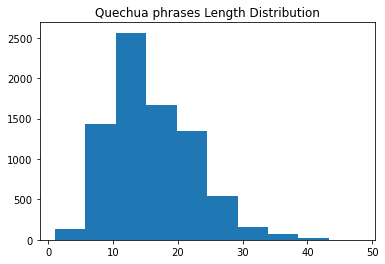

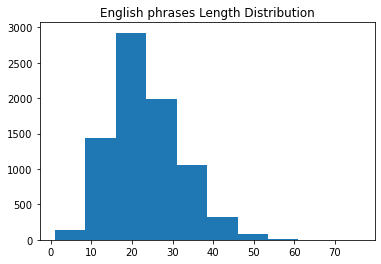

In [15]:
# What is the distribution of phrase lengths in our database?
import matplotlib.pyplot as plt

plt.hist(quechua_bible['Phrase_Length'])
plt.title('Quechua phrases Length Distribution')
plt.show()
plt.hist(english_bible['Phrase_Length'])
plt.title('English phrases Length Distribution')
plt.show()

In [16]:
# Look at the most repeated words in both dataset
import re
from collections import Counter

quechua_bible_all_words = ' '.join(quechua_bible['index_x'])
english_bible_all_words = ' '.join(english_bible['index_x'])

quechua_words = re.findall(r'\w+', quechua_bible_all_words.lower())
Counter(quechua_words).most_common(40)

english_words = re.findall(r'\w+', english_bible_all_words.lower())
Counter(english_words).most_common(40)

[('the', 11435),
 ('and', 8997),
 ('to', 6281),
 ('of', 5475),
 ('you', 3875),
 ('in', 3101),
 ('he', 3027),
 ('for', 2566),
 ('is', 2313),
 ('him', 2272),
 ('a', 2217),
 ('that', 2181),
 ('i', 2173),
 ('not', 2142),
 ('who', 1951),
 ('they', 1816),
 ('but', 1811),
 ('will', 1618),
 ('was', 1440),
 ('his', 1431),
 ('with', 1401),
 ('be', 1379),
 ('them', 1364),
 ('it', 1364),
 ('god', 1334),
 ('are', 1234),
 ('have', 1180),
 ('said', 1166),
 ('from', 1068),
 ('all', 1067),
 ('this', 1052),
 ('as', 1046),
 ('one', 1009),
 ('jesus', 987),
 ('were', 980),
 ('on', 954),
 ('your', 944),
 ('do', 922),
 ('so', 911),
 ('we', 870)]

In [21]:
# Creating Final Dataframe for Translation
english_bible_redux = english_bible[['index_x','Final_Tags']]
quechua_bible_redux = quechua_bible[['index_x','Final_Tags']]
rosetta_bible = english_bible_redux.merge(quechua_bible_redux, on='Final_Tags')
rosetta_bible = rosetta_bible.rename(columns={'index_x_x':'English', 'Final_Tags':'Book_Chapter_Verse', 'index_x_y':'Quechua'})

# converting every letter to lower case
rosetta_bible['Quechua'] = rosetta_bible['Quechua'].apply(lambda x: str(x).lower())
rosetta_bible['English'] = rosetta_bible['English'].apply(lambda x: str(x).lower())

rosetta_bible


,English,Book_Chapter_Verse,Quechua
0,now after jesus was born in bethlehem of judea...,MAT-1-1,"rey herodespa p'unchayninkunapin, judea probin..."
1,``where is he who has been born king of the je...,MAT-1-2,nirqankutaq: —¿judío runakunaq reynin naseqri ...
2,"when herod the king heard this, he was trouble...",MAT-1-3,"chayta uyarispantaqmi, rey herodesqa llapan je..."
3,gathering together all the chief priests and s...,MAT-1-4,hinan llaqtamanta llapan umalliq saserdotekuna...
4,"they said to him, ``in bethlehem of judea; for...",MAT-1-5,paykunataqmi kutichirqanku: —judea probinsiapi...
...,...,...,...
7953,"in his right hand he held seven stars, and out...",REV-22-16,paña makinpitaqmi qanchis ch'askakunata hap'is...
7954,"when i saw him, i fell at his feet like a dead...",REV-22-17,"payta rikuruspaytaqmi, chakinman, wañusqa hina..."
7955,"and the living one; and i was dead, and behold...",REV-22-18,ñoqaqa kawsashanin. wañusqan kasharqani. qhawa...
7956,``therefore write the things which you have se...,REV-22-19,"chay hinaqa, imakunatachus rikusqaykita, imaku..."


# 3.0 Research Papers & Repositories

**1. Machine Learning French & Quechua Translation from English**
- https://github.com/mmfuente95/Springboard-ML_Engineering/blob/main/Springboard%20Coursework/12_05_Scraping%20Quechua%20Data.ipynb
    - Key takeaways:
        - How to implement a Keras/Tensor Flow Deep Learning Neural Network to perform basic translation
        - What are some of the main ways to analysis a repository of text data
        
**2. Quechua Translator using translations produced by a certified Quechua translator** 
- https://github.com/johneortega/mt_quechua_spanish

    - Key takeways:
        - This repository introduces the importance of diminutives, suffixes and prefixes as part of language translator
        - The translation produced by an official translator could be very helpful as inputs in my model

**3. Repository for Critical Low Resource Languages**
- https://github.com/pywirrarika/naki#machine-translation
    - Key takeaways:
        - A lot of work has already been done in the indigenous languages space that has been aggregated in repositories like the following
        - Learned about the existence of the North American Chapter of the Association for Computational Linguistics – Human Language Technologies (NAACL HLT)
        
**4. Paper on the Translation of Bribri (Costa Rican Low Resource Language)|**
- https://aclanthology.org/2020.coling-main.351/
    - Key takeaways:
        - This paper shows how even extremely low resource languages (with enough data) can be used to produced high quality translations
        - This paper also introduces the idea of producing artificial texts using spanish dictionaries to further reinforce the machine's learning potential
        
**5. Paper using Translation of  Shipibo-Konibo (Peruvian Indigenous LanguagE) using Bible Data**
- https://acl-bg.org/proceedings/2017/RANLP%202017/pdf/RANLP033.pdf
    - Key takeaways:
        - The feasiblity of this project might also be impacted by the complexity of the language used in my primary dataset, in spite of it being one of the most common routes people typically take when making rudimentary translators for indigenous languages
        
**6. Evaluating Models (Google)**
- https://cloud.google.com/translate/automl/docs/evaluate
    - Key takeaways:
        - A better understanding of how BLEU (bilingual evaluation understudy) scores are computed and what are decent-to-acceptable thresholds
        - Model performance for translators tends to improve with shorter sentences and its performance dramatically falls once the sentences become longer
        
**7. BLEU Score and BLEUx Score**
- https://towardsdatascience.com/nlp-metrics-made-simple-the-bleu-score-b06b14fbdbc1
    - Key takeaways:
        - BLEU scores are very sensitive since they are evaluating the presence of words in a sentence as a metric
        - BLEU star scores should typically be avoided since this metric is highly inaccurate is not being used as a global metric to assess any sort of NLP models. 
        
        
## Personal Notes & Considerations:
- Should I consider making a sub-dataset for my model that uses full stops to break each individual paragraph/verse into shorter sentences and then feed these sentences into my model?
- Should I try to integrate dictionary data from other Github repositories into my data repository for improved model performance?
- Will training my model on both sentences and full pagraphs of the same text pose some issues in terms of model biases?
- Given the note about how BLEU scores are a bit biased towards shorter phrases I believe I might want to incorporate data coming from things like poems or even children's books. 
    - https://zocalopoets.com/category/a-few-favourites-una-muestra-de-favoritos/poemas-de-amor-en-quechua/
    - http://www.crearensalamanca.com/poemas-en-quechua-y-castellano-de-la-peruana-nora-alarcon/
    - The Little Prince https://indigenasdelperu.files.wordpress.com/2015/09/el-principito_-quyllur-llaqtayuq-wawamanta-el-principito.pdf
    - Don Quixote https://www.scribd.com/document/25537312/Yachay-Sapa-Wiraqucha-Don-Qvixote-Manchamantam